In [1]:
from data_functions import *

In [2]:
BEEF = pd.read_csv('./Data/Brazil - Minerva SA_Brazil (BEEF3).csv')

In [3]:
BEEF

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",10.2,10.35,10.4,10.12,7.77M,-1.54%
1,"Mar 30, 2021",10.36,10.41,10.62,10.3,9.93M,-1.05%
2,"Mar 29, 2021",10.47,9.85,10.5,9.81,22.04M,6.51%
3,"Mar 26, 2021",9.83,9.8,9.94,9.7,5.11M,0.31%
4,"Mar 25, 2021",9.8,10.01,10.01,9.66,8.88M,-1.51%
...,...,...,...,...,...,...,...
305,"Jan 07, 2020",13.48,13.03,13.48,13.03,8.20M,4.58%
306,"Jan 06, 2020",12.89,12.9,12.91,12.57,4.17M,-0.08%
307,"Jan 03, 2020",12.9,12.45,12.93,12.27,4.88M,2.63%
308,"Jan 02, 2020",12.57,12.88,12.99,12.57,5.78M,-2.10%


In [4]:
## drop last row because it doesn't contain relevant information

BEEF.drop(309, inplace=True)

In [5]:
## change date column to datetime

BEEF['Date'] = pd.to_datetime(BEEF['Date'], format='%b %d, %Y')

In [6]:
## change price columns to integer

BEEF['Price'] = pd.to_numeric(BEEF['Price'])
BEEF['Open'] = pd.to_numeric(BEEF['Open'])
BEEF['High'] = pd.to_numeric(BEEF['High'])
BEEF['Low'] = pd.to_numeric(BEEF['Low'])

In [7]:
BEEF.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
BEEF

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,12.57,12.88,12.99,12.57,5.78M,-2.10%
1,2020-01-03,12.90,12.45,12.93,12.27,4.88M,2.63%
2,2020-01-06,12.89,12.90,12.91,12.57,4.17M,-0.08%
3,2020-01-07,13.48,13.03,13.48,13.03,8.20M,4.58%
4,2020-01-08,13.63,13.50,13.68,13.18,6.18M,1.11%
...,...,...,...,...,...,...,...
304,2021-03-25,9.80,10.01,10.01,9.66,8.88M,-1.51%
305,2021-03-26,9.83,9.80,9.94,9.70,5.11M,0.31%
306,2021-03-29,10.47,9.85,10.50,9.81,22.04M,6.51%
307,2021-03-30,10.36,10.41,10.62,10.30,9.93M,-1.05%


In [8]:
## find rows for 2021 data

BEEF.loc[BEEF['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
249,2021-01-04,10.04,10.23,10.32,10.03,6.12M,-1.38%
250,2021-01-05,9.84,10.07,10.10,9.77,13.66M,-1.99%
251,2021-01-06,9.69,9.85,9.86,9.69,8.36M,-1.52%
252,2021-01-07,9.65,9.75,9.81,9.62,7.77M,-0.41%
253,2021-01-08,9.73,9.67,9.85,9.66,7.46M,0.83%
254,2021-01-11,9.61,9.70,9.80,9.60,10.90M,-1.23%
255,2021-01-12,9.99,9.68,10.03,9.62,14.24M,3.95%
256,2021-01-13,9.80,10.05,10.06,9.68,11.38M,-1.90%
257,2021-01-14,9.82,9.86,9.96,9.73,7.00M,0.20%
258,2021-01-15,9.72,9.80,9.82,9.69,6.36M,-1.02%


In [9]:
## split training data and testing data, testing data will be the year of 2021

training_data = BEEF[['Date', 'Price']][:249]
testing_data = BEEF[['Date', 'Price']][249:]

In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(BEEF[['Price']])
scaled_train_data = scaled_data[:249]

# Daily

In [11]:
X_train, y_train = get_train_data(scaled_train_data, 12)
X_test, y_test = get_test_data(BEEF, testing_data, scaler, 12)

In [12]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [13]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [14]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.3495454788208008
Epoch  1 MSE:  0.13921113312244415
Epoch  2 MSE:  0.05225715786218643
Epoch  3 MSE:  0.05387625843286514
Epoch  4 MSE:  0.040258899331092834
Epoch  5 MSE:  0.04892996326088905
Epoch  6 MSE:  0.04839097335934639
Epoch  7 MSE:  0.04022546485066414
Epoch  8 MSE:  0.03433895856142044
Epoch  9 MSE:  0.037794727832078934
Epoch  10 MSE:  0.03916781768202782
Epoch  11 MSE:  0.03179744631052017
Epoch  12 MSE:  0.028337325900793076
Epoch  13 MSE:  0.029565606266260147
Epoch  14 MSE:  0.02838953584432602
Epoch  15 MSE:  0.022184036672115326
Epoch  16 MSE:  0.017752019688487053
Epoch  17 MSE:  0.021656092256307602
Epoch  18 MSE:  0.012226433493196964
Epoch  19 MSE:  0.014601096510887146
Epoch  20 MSE:  0.013773088343441486
Epoch  21 MSE:  0.009380253963172436
Epoch  22 MSE:  0.014997770078480244
Epoch  23 MSE:  0.010705996304750443
Epoch  24 MSE:  0.014234552159905434
Epoch  25 MSE:  0.008344988338649273
Epoch  26 MSE:  0.011618961580097675
Epoch  27 MSE:  0.00868

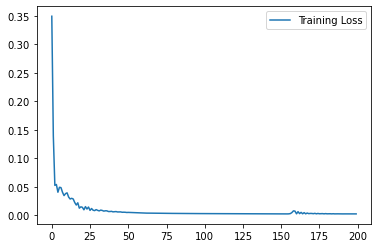

In [15]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [16]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.40 RMSE
Test Score: 0.24 RMSE


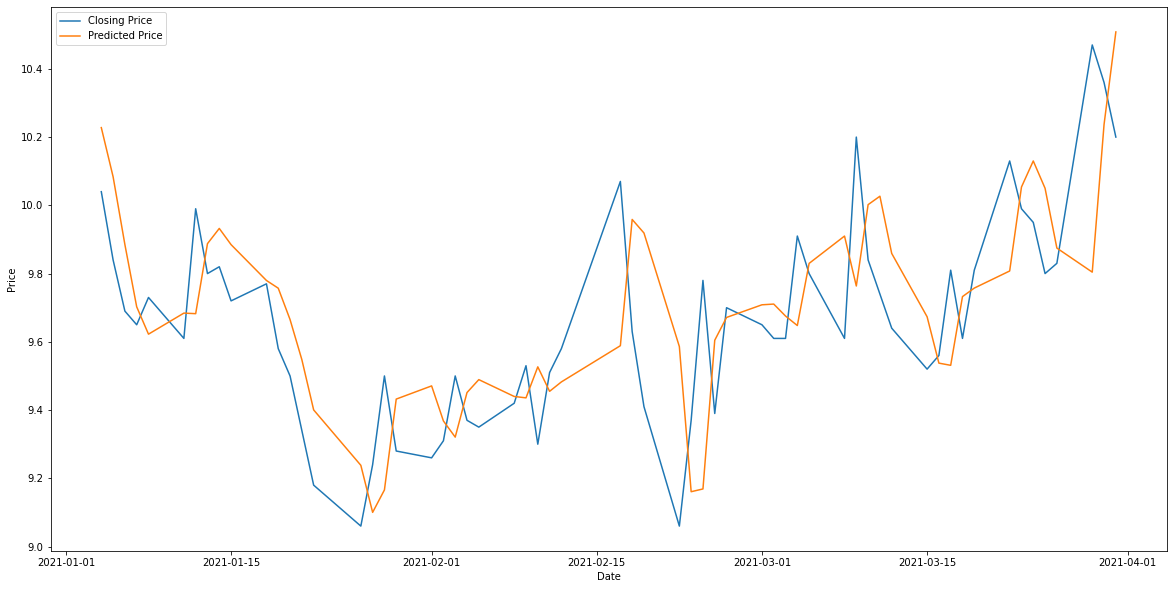

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [18]:
boll_daily = BEEF[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_daily['Price'] = price
boll_daily['SMA'] = sma(boll_daily['Price'], 9)
boll_daily['upper_bb'], boll_daily['lower_bb'] = bollinger(boll_daily['Price'], boll_daily['SMA'], 9)
boll_daily

C:\Users\Chris\AppData\Local\Temp/ipykernel_2696/3822676313.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_2696/3822676313.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_daily['SMA'] = sma(boll_daily['Price'], 9)
C:\Users\Chris\AppData\Local\Temp/ipykernel_2696/3822676313.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,12.570000,NaN,NaN,NaN
1,2020-01-03,12.900000,NaN,NaN,NaN
2,2020-01-06,12.890000,NaN,NaN,NaN
3,2020-01-07,13.480000,NaN,NaN,NaN
4,2020-01-08,13.630000,NaN,NaN,NaN
...,...,...,...,...,...
304,2021-03-25,10.049951,9.808164,10.254655,9.361673
305,2021-03-26,9.874769,9.830529,10.266708,9.394350
306,2021-03-29,9.804228,9.860158,10.239280,9.481037
307,2021-03-30,10.236900,9.938574,10.303141,9.574007


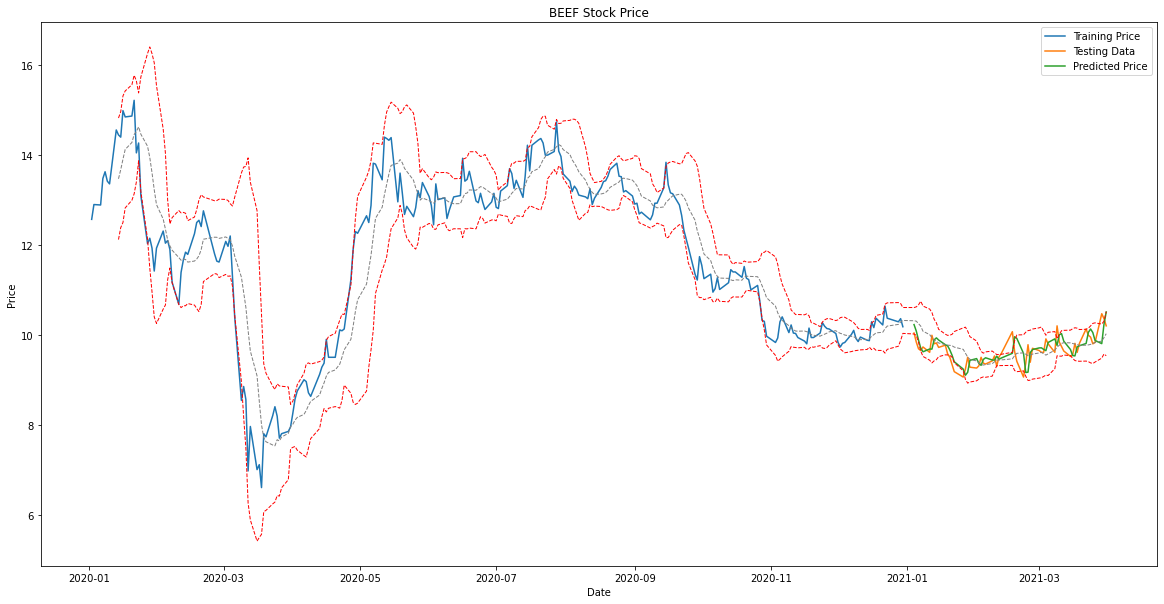

In [19]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'], boll_daily['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'], boll_daily['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BEEF Stock Price')
plt.legend()
plt.show()

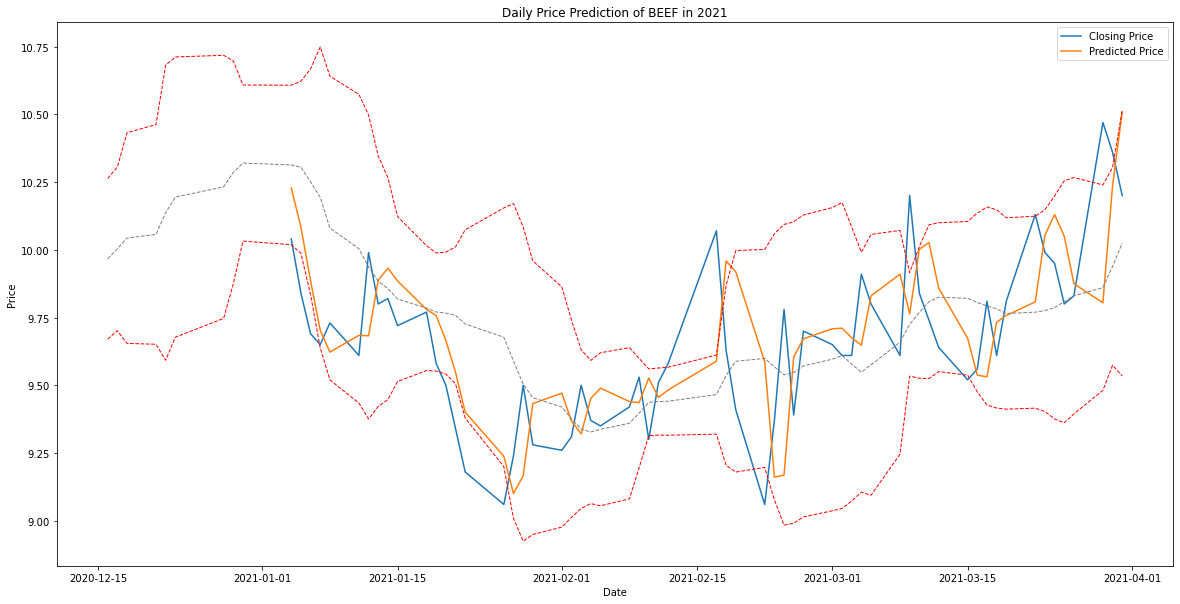

In [20]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_daily['Date'][240:], boll_daily['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_daily['Date'][240:], boll_daily['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Daily Price Prediction of BEEF in 2021')
plt.legend()
plt.show()

# Weekly

In [25]:
len(BEEF) - len(testing_data)

249

In [27]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 14)
X_test_w, y_test_w = get_weekly_test_data(BEEF, testing_data, scaler, 14)

In [28]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [29]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [30]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.4107789993286133
Epoch  1 MSE:  0.2778833508491516
Epoch  2 MSE:  0.13896799087524414
Epoch  3 MSE:  0.072446309030056
Epoch  4 MSE:  0.054221611469984055
Epoch  5 MSE:  0.04347662255167961
Epoch  6 MSE:  0.05632517859339714
Epoch  7 MSE:  0.05356203392148018
Epoch  8 MSE:  0.04469938948750496
Epoch  9 MSE:  0.041539717465639114
Epoch  10 MSE:  0.04283883050084114
Epoch  11 MSE:  0.04112502560019493
Epoch  12 MSE:  0.03736216947436333
Epoch  13 MSE:  0.035866864025592804
Epoch  14 MSE:  0.03669123724102974
Epoch  15 MSE:  0.03706503286957741
Epoch  16 MSE:  0.03540720418095589
Epoch  17 MSE:  0.03263799101114273
Epoch  18 MSE:  0.030688827857375145
Epoch  19 MSE:  0.029624957591295242
Epoch  20 MSE:  0.02701440453529358
Epoch  21 MSE:  0.022714341059327126
Epoch  22 MSE:  0.020230473950505257
Epoch  23 MSE:  0.0184741523116827
Epoch  24 MSE:  0.01441042311489582
Epoch  25 MSE:  0.018053628504276276
Epoch  26 MSE:  0.01670948415994644
Epoch  27 MSE:  0.01818059571087360

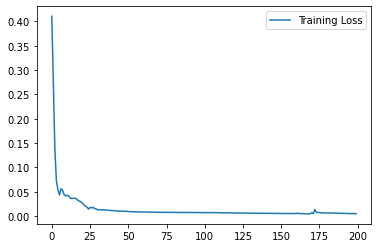

In [31]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [32]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 11.27 RMSE
Test Score: 9.78 RMSE


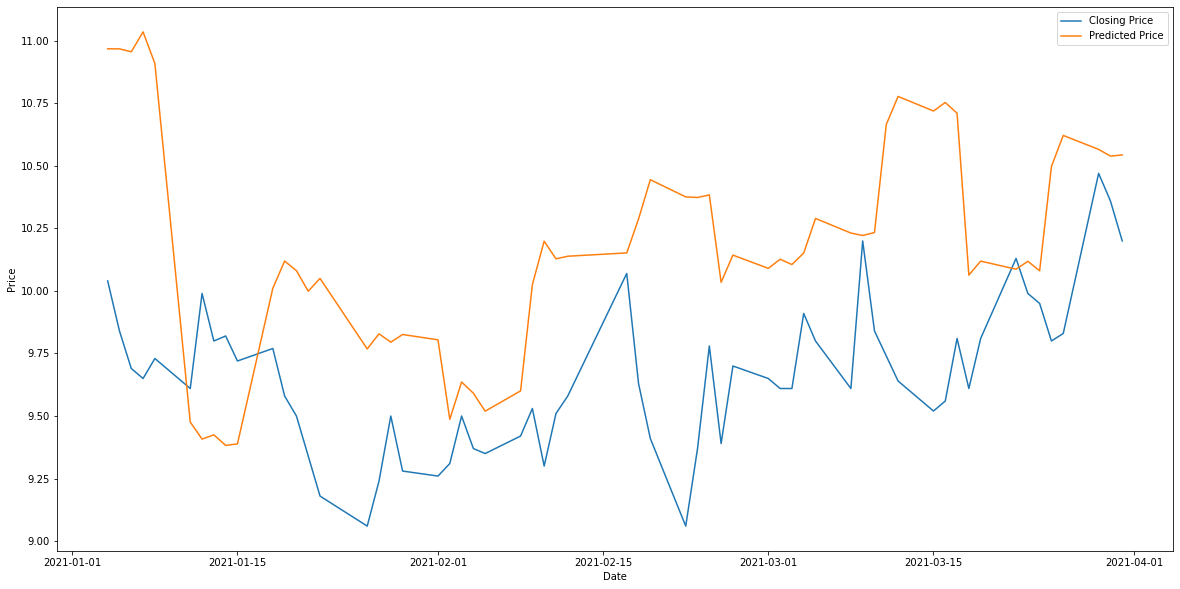

In [33]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
boll_weekly = BEEF[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_weekly['Price'] = price
boll_weekly['SMA'] = sma(boll_weekly['Price'], 9)
boll_weekly['upper_bb'], boll_weekly['lower_bb'] = bollinger(boll_weekly['Price'], boll_weekly['SMA'], 9)
boll_weekly

C:\Users\Chris\AppData\Local\Temp/ipykernel_2696/3997692845.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_2696/3997692845.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_weekly['SMA'] = sma(boll_weekly['Price'], 9)
C:\Users\Chris\AppData\Local\Temp/ipykernel_2696/3997692845.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,12.570000,NaN,NaN,NaN
1,2020-01-03,12.900000,NaN,NaN,NaN
2,2020-01-06,12.890000,NaN,NaN,NaN
3,2020-01-07,13.480000,NaN,NaN,NaN
4,2020-01-08,13.630000,NaN,NaN,NaN
...,...,...,...,...,...
304,2021-03-25,10.497431,10.349962,10.975125,9.724799
305,2021-03-26,10.621758,10.339103,10.938237,9.739970
306,2021-03-29,10.565900,10.318273,10.863172,9.773373
307,2021-03-30,10.539129,10.299226,10.791906,9.806547


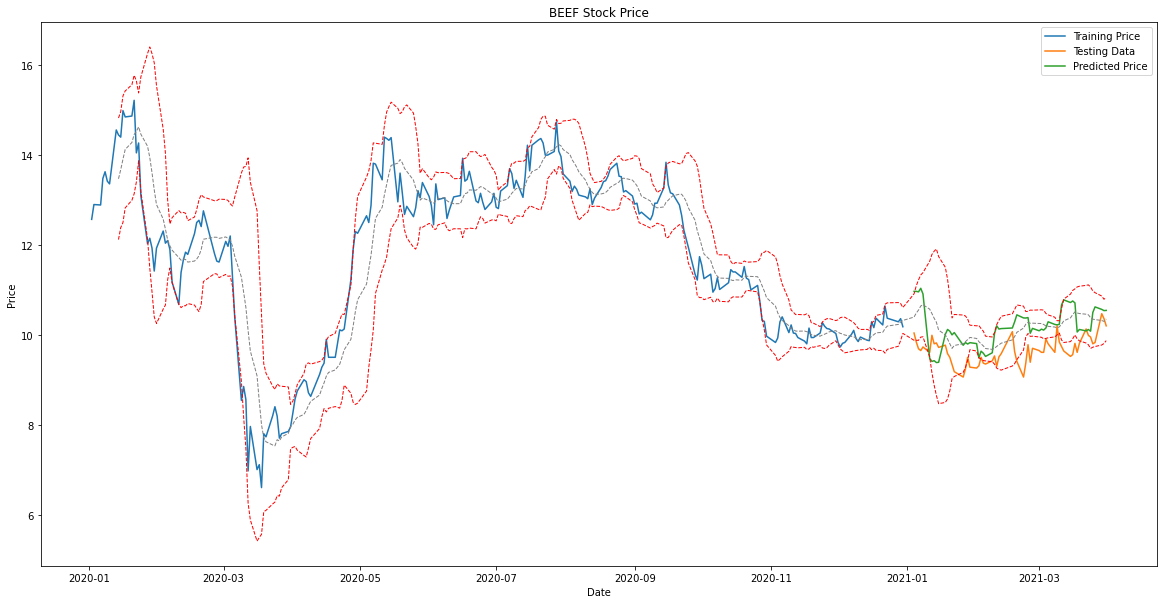

In [35]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'], boll_weekly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'], boll_weekly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BEEF Stock Price')
plt.legend()
plt.show()

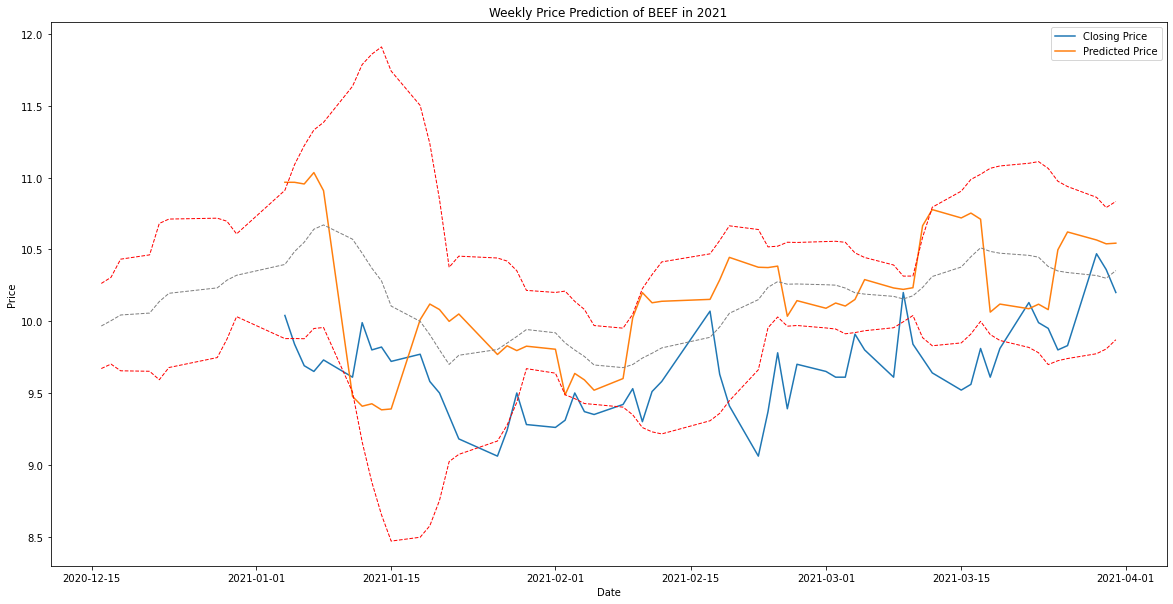

In [36]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_weekly['Date'][240:], boll_weekly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_weekly['Date'][240:], boll_weekly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Weekly Price Prediction of BEEF in 2021')
plt.legend()
plt.show()

# Monthly

In [ ]:
249

In [59]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 29)
X_test_m, y_test_m = get_monthly_test_data(BEEF, testing_data, scaler, 29)

In [60]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [61]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [62]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.4040975272655487
Epoch  1 MSE:  0.33739712834358215
Epoch  2 MSE:  0.24910341203212738
Epoch  3 MSE:  0.09504742920398712
Epoch  4 MSE:  0.19290432333946228
Epoch  5 MSE:  0.10324645787477493
Epoch  6 MSE:  0.05147690325975418
Epoch  7 MSE:  0.05002119764685631
Epoch  8 MSE:  0.06138240173459053
Epoch  9 MSE:  0.06831452995538712
Epoch  10 MSE:  0.06875156611204147
Epoch  11 MSE:  0.06538254022598267
Epoch  12 MSE:  0.06103629991412163
Epoch  13 MSE:  0.05742189288139343
Epoch  14 MSE:  0.054961126297712326
Epoch  15 MSE:  0.053184378892183304
Epoch  16 MSE:  0.05149931460618973
Epoch  17 MSE:  0.04977453127503395
Epoch  18 MSE:  0.04832899942994118
Epoch  19 MSE:  0.047537244856357574
Epoch  20 MSE:  0.04748738929629326
Epoch  21 MSE:  0.04792410507798195
Epoch  22 MSE:  0.04843267798423767
Epoch  23 MSE:  0.04865850880742073
Epoch  24 MSE:  0.0484340563416481
Epoch  25 MSE:  0.047793399542570114
Epoch  26 MSE:  0.04690781235694885
Epoch  27 MSE:  0.04599067196249962


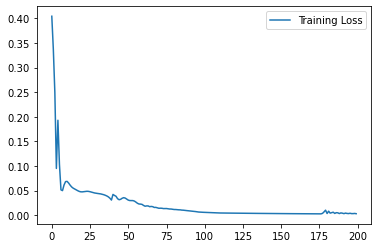

In [63]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [64]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 10.85 RMSE
Test Score: 8.27 RMSE


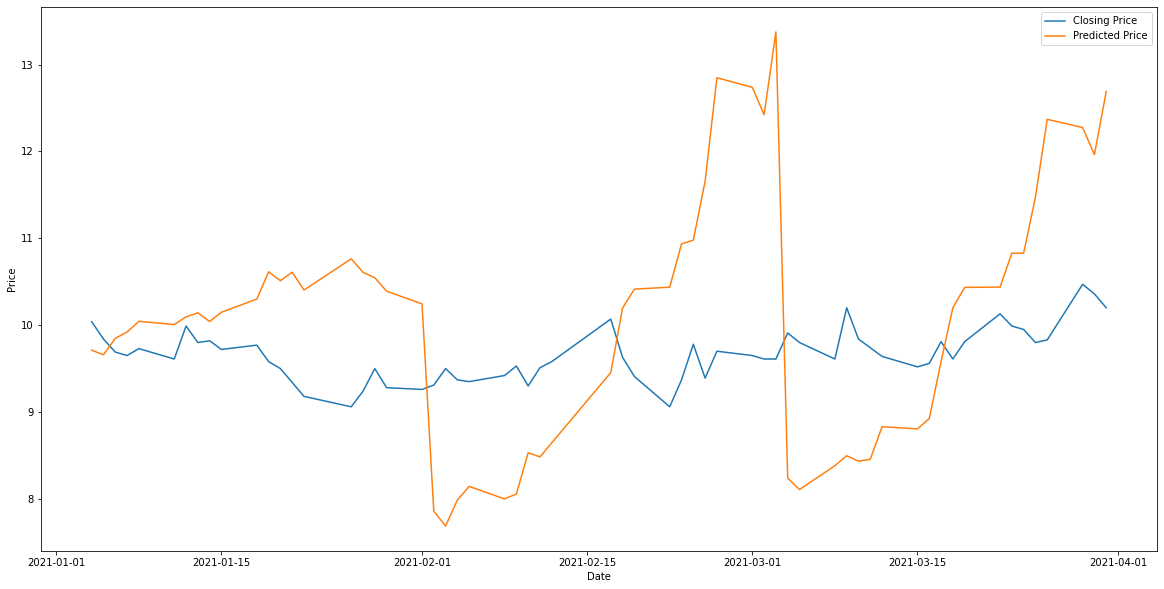

In [65]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [66]:
boll_monthly = BEEF[['Date']]

price = np.array(training_data['Price'])
price = np.append(price, y_test_pred.reshape(-1))

boll_monthly['Price'] = price
boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
boll_monthly['upper_bb'], boll_monthly['lower_bb'] = bollinger(boll_monthly['Price'], boll_monthly['SMA'], 10)
boll_monthly

C:\Users\Chris\AppData\Local\Temp/ipykernel_2696/64854687.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['Price'] = price
C:\Users\Chris\AppData\Local\Temp/ipykernel_2696/64854687.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boll_monthly['SMA'] = sma(boll_monthly['Price'], 10)
C:\Users\Chris\AppData\Local\Temp/ipykernel_2696/64854687.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Date,Price,SMA,upper_bb,lower_bb
0,2020-01-02,12.570000,NaN,NaN,NaN
1,2020-01-03,12.900000,NaN,NaN,NaN
2,2020-01-06,12.890000,NaN,NaN,NaN
3,2020-01-07,13.480000,NaN,NaN,NaN
4,2020-01-08,13.630000,NaN,NaN,NaN
...,...,...,...,...,...
304,2021-03-25,11.472825,10.034382,11.928939,8.139825
305,2021-03-26,12.369303,10.388195,12.581958,8.194431
306,2021-03-29,12.274315,10.735118,12.913394,8.556842
307,2021-03-30,11.963129,11.038947,12.922650,9.155244


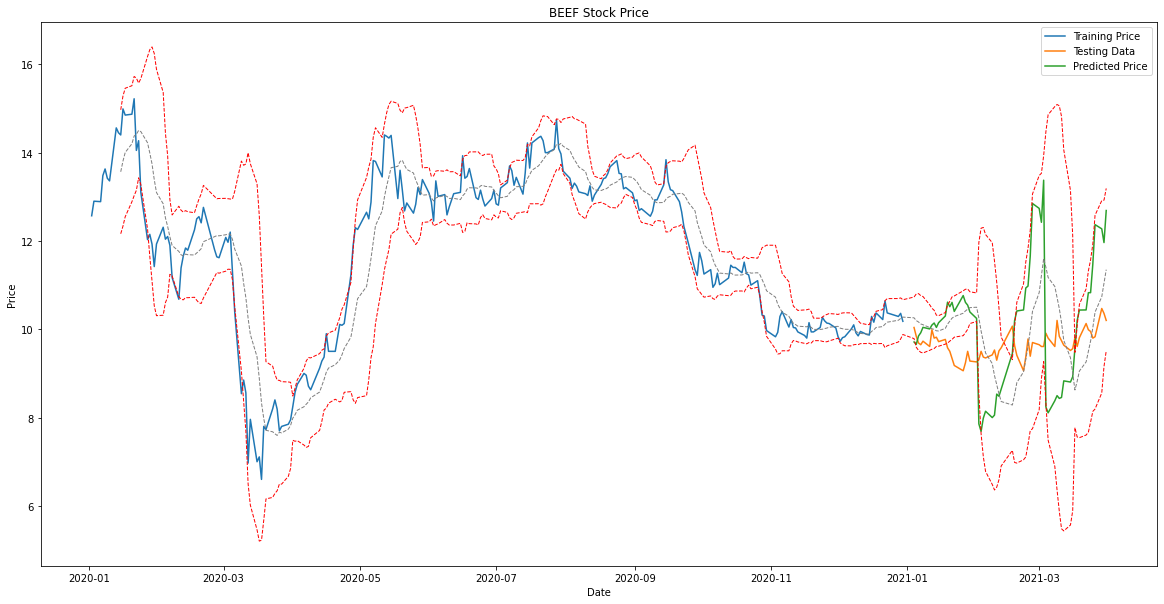

In [67]:
plt.figure(figsize=(20, 10))

plt.plot(training_data['Date'], training_data['Price'], label='Training Price')
plt.plot(testing_data['Date'], testing_data['Price'], label='Testing Data')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'], boll_monthly['upper_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['lower_bb'], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'], boll_monthly['SMA'], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('BEEF Stock Price')
plt.legend()
plt.show()

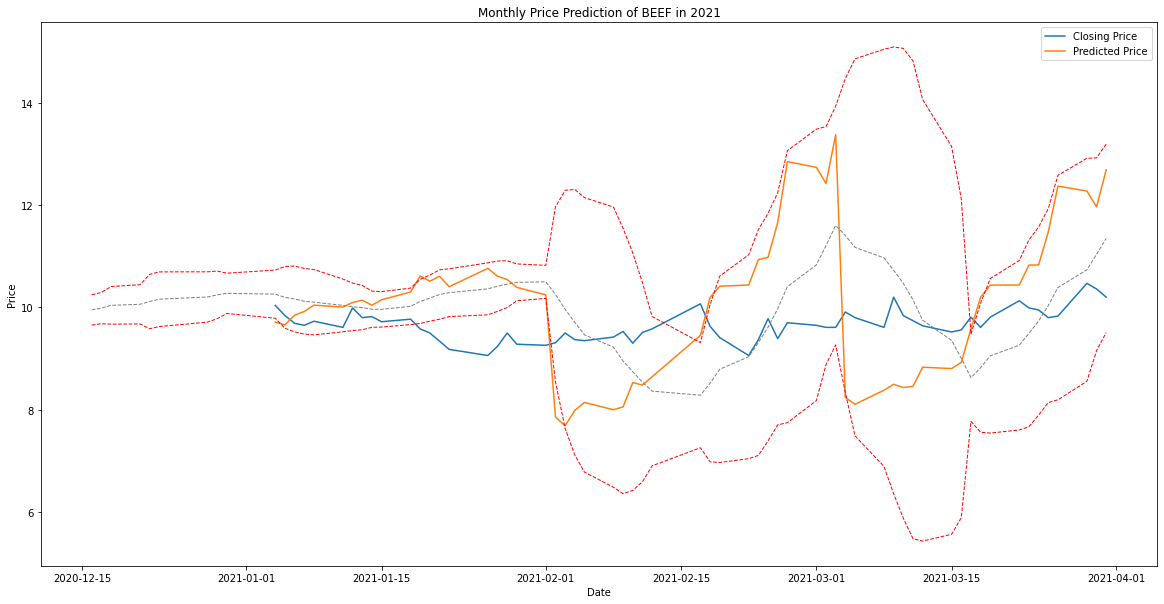

In [68]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], testing_data['Price'], label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.plot(boll_monthly['Date'][240:], boll_monthly['upper_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['lower_bb'][240:], linestyle = '--', linewidth=1, color='red')
plt.plot(boll_monthly['Date'][240:], boll_monthly['SMA'][240:], linestyle='--', linewidth=1, color='gray')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Monthly Price Prediction of BEEF in 2021')
plt.legend()
plt.show()